
# Prediction with new pre-trained models 

In [10]:
import math
import skimage
import numpy as np
import os
import matplotlib.pyplot as plt

import tensorflow as tf
#from keras import backend
from keras.layers import *
from keras.models import load_model
from skimage.measure import compare_psnr
from unet3 import cross_entropy_balanced
import os

os.environ["CUDA_VISIBLE_DEVICES"] = ""

pngDir = './png/'
md = 60#,65,70 #trained models at different epoch
model = load_model('model/fseg-'+str(md)+'.hdf5',
        custom_objects={'cross_entropy_balanced': cross_entropy_balanced})


## ======================================================================


## prediction test on a training image 

1/1 [==============================] - 0s 373ms/step


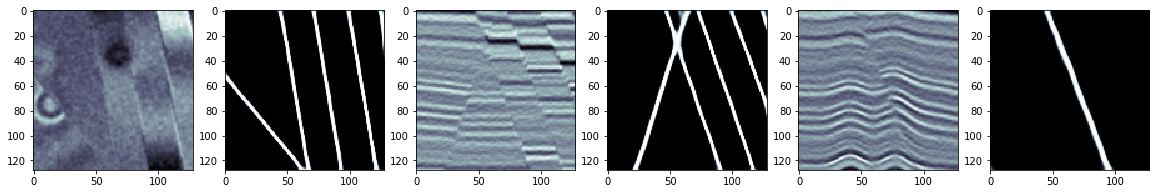

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
seismPath = "./data/validation/seis/"
faultPath = "./data/validation/fault/"
n1,n2,n3=128,128,128
dk = 2
gx = np.fromfile(seismPath+str(dk)+'.dat',dtype=np.single)
fx = np.fromfile(faultPath+str(dk)+'.dat',dtype=np.single)
gx = np.reshape(gx,(n1,n2,n3))
fx = np.reshape(fx,(n1,n2,n3))
gm = np.mean(gx)
gs = np.std(gx)
gx = gx-gm
gx = gx/gs
gx = np.transpose(gx)
fx = np.transpose(fx)
fp = model.predict(np.reshape(gx,(1,n1,n2,n3,1)),verbose=1)
fp = fp[0,:,:,:,0]
fig = plt.figure(figsize=(20,20))
#time slice
k1 = 50
plt.subplot(1, 6, 1)
imgplot1 = plt.imshow(gx[k1,:,:],cmap=plt.cm.bone,interpolation='nearest',aspect=1)
plt.subplot(1, 6, 2)
imgplot2 = plt.imshow(fp[k1,:,:],cmap=plt.cm.bone,interpolation='nearest',aspect=1)
#inline slice
k2 = 110
plt.subplot(1, 6, 3)
imgplot1 = plt.imshow(gx[:,k2,:],cmap=plt.cm.bone,interpolation='nearest',aspect=1)
plt.subplot(1, 6, 4)
imgplot2 = plt.imshow(fp[:,k2,:],cmap=plt.cm.bone,interpolation='nearest',aspect=1)

#xline slice
k3 = 10
plt.subplot(1, 6, 5)
imgplot1 = plt.imshow(gx[:,:,k3],cmap=plt.cm.bone,interpolation='nearest',aspect=1)
plt.subplot(1, 6, 6)
imgplot2 = plt.imshow(fp[:,:,k3],cmap=plt.cm.bone,interpolation='nearest',aspect=1)

 
## ======================================================================

## prediction test on a field seismic image extracted from

## the Netherlands off-shore F3 block seismic data

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
seismPath = "./data/prediction/f3d/"
n3,n2,n1=512,384,128
gx = np.fromfile(seismPath+'gxl.dat',dtype=np.single)
gx = np.reshape(gx,(n3,n2,n1))
gm = np.mean(gx)
gs = np.std(gx)
gx = gx-gm
gx = gx/gs
gx = np.transpose(gx)
fp = model.predict(np.reshape(gx,(1,n1,n2,n3,1)),verbose=1)
fp = fp[0,:,:,:,0]
ft = np.transpose(fp)
ft.tofile("data/prediction/f3d/"+"fp.dat",format="%4")

1/1 [==============================] - 2s 2s/step


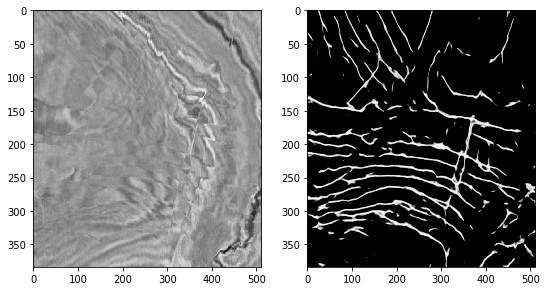

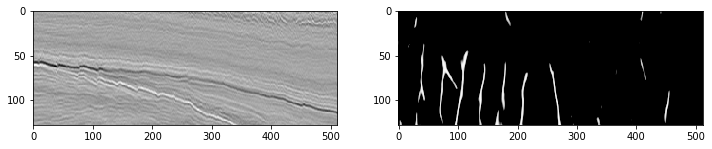

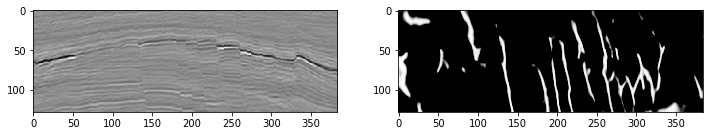

In [13]:
from matplotlib.colors import Normalize
from PIL import Image

k1,k2,k3 = 99,29,29
gx1 = gx[k1,:,:]
gy1 = fp[k1,:,:]
gx2 = gx[:,k2,:]
gy2 = fp[:,k2,:]
gx3 = gx[:,:,k3]
gy3 = fp[:,:,k3]

#xline slice
fig = plt.figure(figsize=(9,9))
p1 = plt.subplot(1, 2, 1)
p1.imshow(gx1,aspect=1.5,cmap=plt.cm.gray)
p2 = plt.subplot(1,2,2)
p2.imshow(gy1,aspect=1.5,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)

#inline slice
fig = plt.figure(figsize=(12,12))
p1 = plt.subplot(1, 2, 1)
p1.imshow(gx2,aspect=1.5,cmap=plt.cm.gray)
p2 = plt.subplot(1,2,2)
p2.imshow(gy2,aspect=1.5,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)

#time slice
fig = plt.figure(figsize=(12,12))
p1 = plt.subplot(1, 2, 1)
p1.imshow(gx3,cmap=plt.cm.gray)
p2 = plt.subplot(1,2,2)
p2.imshow(gy3,interpolation="bilinear",vmin=0.4,vmax=1.0,cmap=plt.cm.gray)
